**Effects of Daily Average Humidity and Temperature on Daily Average Tungsten Oxide Concentration**


In [134]:
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(1000)

Pollutant levels or concentrations in the atmosphere lead to changes in the climate such as an increase in temperature and humidity levels. Measuring atmospheric pollutant concentrations requires air quality monitors and satellite imagery. Using other predictors such as temperature and humidity levels to determine concentration could be effective and less costly (EPA, 2024). This project aims to assess whether a linear regression model can be used to predict the average daily chemical concentration of tungsten oxide given averages of relative humidity, absolute humidity and temperature. Our overall research question is: Can the daily average air concentration of tungsten oxide (microg/m^3) be predicted using the daily averages of temperature, relative and absolute humidity? The dataset that was used to complete this analysis is the Air Quality dataset from the UC Irvine Machine Learning Repository (Vito, 2016). 

The data used was collected in an Italian city every hour in 2004, resulting in 9358 total observations in the dataset. The variables are: date, time, temperature (T), absolute humidity (AH), relative humidity (RH), and concentrations for carbon monoxide (CO), tin oxide (PT08.S1), non-methane hydrocarbons (NMHC), benzene (C6H6), titania (PT08.S1), nitric oxides (NOx, where x= 1,2,3, or 4), tungsten oxide (PT08.S3(NOx), and PT08.S4(NO2)), nitrogen dioxide(NO2), and indium oxide (PT08.S5)
.

In [135]:
air_quality <- read_csv("https://raw.githubusercontent.com/recompton/DSCI100_group_project/main/AirQualityUCI.csv?token=GHSAT0AAAAAACPKFCCOAGKVC5S4EIWAUNNAZPMZKGA")
head(air_quality)

New names:
• `` -> `...16`
• `` -> `...17`
Rows: 9471 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): Date
dbl  (13): CO_GT, PT08.S1_CO, NMHC_GT, C6H6_GT, PT08.S2_NMHC, Nox_GT, PT08.S...
lgl   (2): ...16, ...17
time  (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Time,CO_GT,PT08.S1_CO,NMHC_GT,C6H6_GT,PT08.S2_NMHC,Nox_GT,PT08.S3_Nox,NO2_GT,PT08.S4_NO2,PT08.S5_O3,T,RH,AH,...16,...17
<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA
3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA
3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA
3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA
3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA
3/10/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA


Before starting the analysis, we tidied our data with a single pollutant column, since we are only looking at tungsten oxide. In an ideal situation, we expect 365 observations in our wrangled data. During wrangling, we changed the pollutant column name from PT08.S4(NO2) to PT08.S4_NO2, as R was interpreting the name as a function. The format of the date was also changed from year/month/day to month-day-year, and split into 3 columns to compute the daily average. The data also had extraneous rows and columns which were removed. There were 130 rows with no values, and two columns labeled 16 and 17 which only had NA listed in every row.


In [136]:
air_quality_1 <- mutate(air_quality, Date = mdy(Date))
head(air_quality_1)

Date,Time,CO_GT,PT08.S1_CO,NMHC_GT,C6H6_GT,PT08.S2_NMHC,Nox_GT,PT08.S3_Nox,NO2_GT,PT08.S4_NO2,PT08.S5_O3,T,RH,AH,...16,...17
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA


In [137]:
air_quality_2 <- air_quality_1 |>
mutate(year = year(Date),
month = month(Date),
day = day(Date))

head(air_quality_2)

Date,Time,CO_GT,PT08.S1_CO,NMHC_GT,C6H6_GT,PT08.S2_NMHC,Nox_GT,PT08.S3_Nox,NO2_GT,PT08.S4_NO2,PT08.S5_O3,T,RH,AH,...16,...17,year,month,day
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA,2004,3,10
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA,2004,3,10
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA,2004,3,10
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA,2004,3,10
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA,2004,3,10
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA,2004,3,10


In [138]:
sliced_air_quality <- air_quality_2 |>
slice(1:9357) 


head(sliced_air_quality)

Date,Time,CO_GT,PT08.S1_CO,NMHC_GT,C6H6_GT,PT08.S2_NMHC,Nox_GT,PT08.S3_Nox,NO2_GT,PT08.S4_NO2,PT08.S5_O3,T,RH,AH,...16,...17,year,month,day
<date>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>
2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NA,NA,2004,3,10
2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NA,NA,2004,3,10
2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NA,NA,2004,3,10
2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NA,NA,2004,3,10
2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NA,NA,2004,3,10
2004-03-10,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NA,NA,2004,3,10


In [139]:
avg_air_quality <- sliced_air_quality |>
filter(PT08.S4_NO2	 != -200)|>
filter(T != -200) |>
filter(RH != -200) |>
filter(AH != -200) |>
group_by(month, day) |>
summarize(
    daily_avg_TO = mean(PT08.S4_NO2, na.rm = TRUE),
    daily_avg_T = mean(T, na.rm = TRUE),
    daily_avg_RH = mean(RH, na.rm = TRUE),
    daily_avg_AH = mean(AH, na.rm = TRUE))

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


Table 1: Daily Average Variables for the Training Data

To begin our analysis, we divided the data into 75% training data and 25% testing data such that we could calculate the daily averages of the variables in our model.This was done for our three predictor variables so that we could determine which ones are good predictors for our response variable.

In [140]:
avg_air_quality_split <- initial_split(avg_air_quality, prop = 0.75, strata = daily_avg_TO)
avg_air_quality_train <- training(avg_air_quality_split)
avg_air_quality_test <- testing(avg_air_quality_split)

In [141]:
head(avg_air_quality_train)

month,day,daily_avg_TO,daily_avg_T,daily_avg_RH,daily_avg_AH
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,1226.5417,13.445833,61.07083,0.9321417
1,16,948.3333,7.525000,47.77917,0.4804167
1,17,1163.3333,6.666667,46.91667,0.4469125
1,19,1072.4583,7.816667,64.99583,0.6895000
1,20,1136.7500,10.075000,44.24583,0.5263417
1,22,1283.5000,9.941667,55.85417,0.6523542


Table 2: Daily Average Variables for the Testing Data

In [142]:
head(avg_air_quality_test)

month,day,daily_avg_TO,daily_avg_T,daily_avg_RH,daily_avg_AH
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1032.6250,6.870833,50.79583,0.4989708
1,2,1063.1429,6.580952,59.28095,0.5709476
1,9,1257.7500,14.437500,58.99583,0.9614458
1,15,1210.5000,6.429167,70.20417,0.6710333
1,25,869.3750,4.512500,50.97083,0.4323125
1,26,873.0417,4.208333,49.48333,0.4119333


In [143]:
num_rows <- nrow(avg_air_quality_train)
num_rows

[1] 265

We chose PT08.S4(NO2) because it has 357 rows total (265 in the training data) after filtering out the NA (-200) values. Additionally, this chemical showed promise for a good correlation when visualizing its relationship with RH, AH and T in our preliminary exploratory analysis. To make our analysis reproducible, we set the seed to 1000. 

As part of our preliminary analysis we provided 3 scatterplots (one for each predictor) with absolute humidity, relative humidity and temperature on the x-axis and the concentration of tungsten oxide is on the y-axis.  

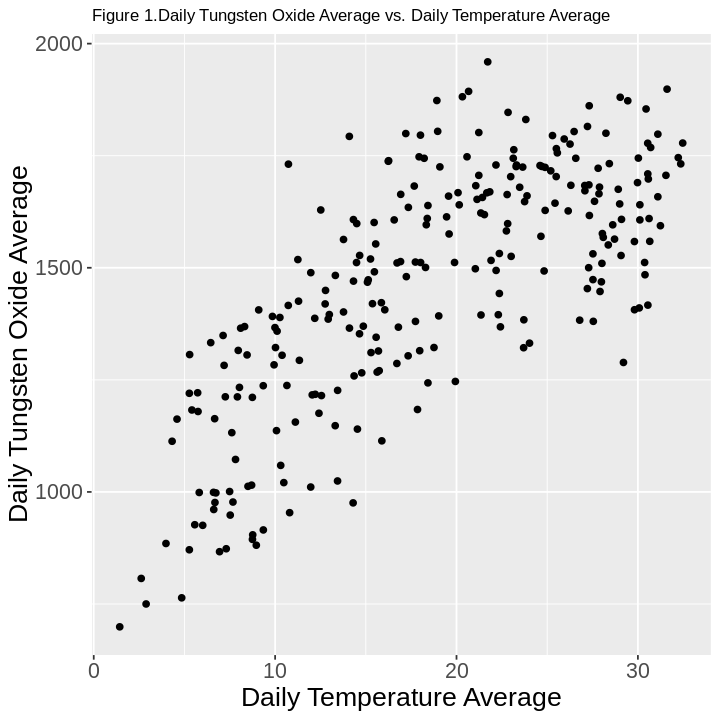

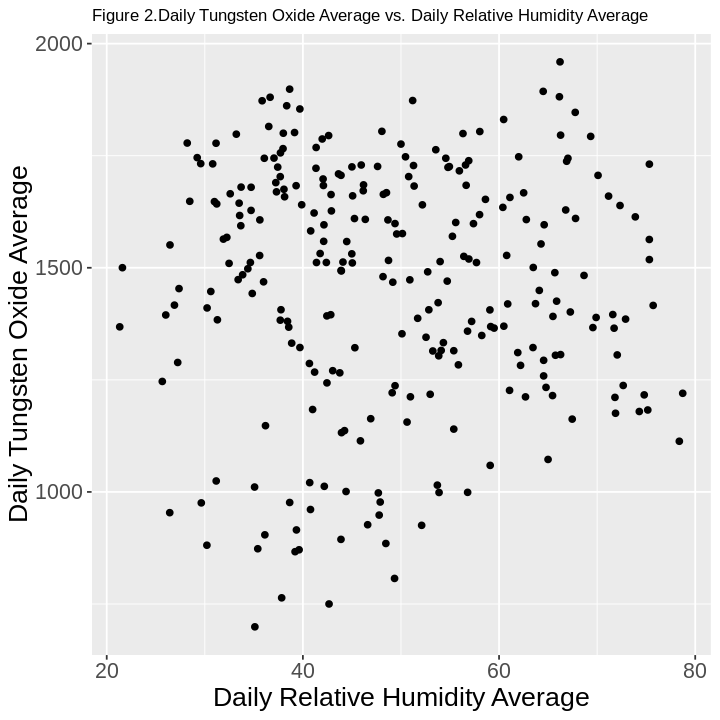

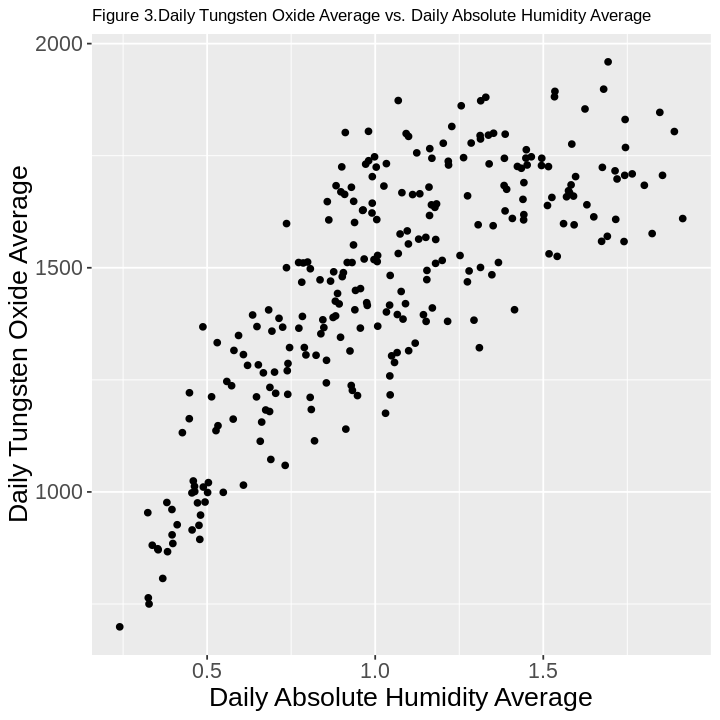

In [144]:
options(repr.plot.width = 6, repr.plot.height = 6)

ggplot(avg_air_quality_train, aes(x = daily_avg_T, y = daily_avg_TO)) +
  geom_point() +
  labs(title = "Figure 1.Daily Tungsten Oxide Average vs. Daily Temperature Average",
       x = "Daily Temperature Average",
       y = "Daily Tungsten Oxide Average") +
theme(text = element_text(size = 16)) +
theme(plot.title = element_text(size = 10))

ggplot(avg_air_quality_train, aes(x = daily_avg_RH, y = daily_avg_TO)) +
  geom_point() +
  labs(title = "Figure 2.Daily Tungsten Oxide Average vs. Daily Relative Humidity Average",
       x = "Daily Relative Humidity Average",
       y = "Daily Tungsten Oxide Average") +
theme(text = element_text(size = 16)) +
theme(plot.title = element_text(size = 10))

ggplot(avg_air_quality_train, aes(x = daily_avg_AH, y = daily_avg_TO)) +
  geom_point() +
  labs(title = "Figure 3.Daily Tungsten Oxide Average vs. Daily Absolute Humidity Average",
       x = "Daily Absolute Humidity Average",
       y = "Daily Tungsten Oxide Average") + 
theme(text = element_text(size = 16)) +
theme(plot.title = element_text(size = 10))

We then created a specification for our model where we set the mode to “regression” and the engine to “lm”, now allowing us to run linear regressions. We made a recipe with all the predictors, and combined this information into a workflow. 

Using the training data, we created 3 visualizations to observe the line of best fit in each plot for each of our predictors. The intention was to gauge the strength of each correlation and assess whether or not the predictor should be used in the final analysis with the testing data.



In [145]:
lm_spec <- linear_reg() |> set_engine("lm") |>
          set_mode("regression")
lm_spec


lm_recipe_T <- recipe(daily_avg_TO ~ daily_avg_T, data = avg_air_quality_train)

lm_fit_T <- workflow() |>
       add_recipe(lm_recipe_T) |>
       add_model(lm_spec) |>
       fit(data = avg_air_quality_train)

lm_fit_T

Linear Regression Model Specification (regression)

Computational engine: lm 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)  daily_avg_T  
     997.73        24.95  


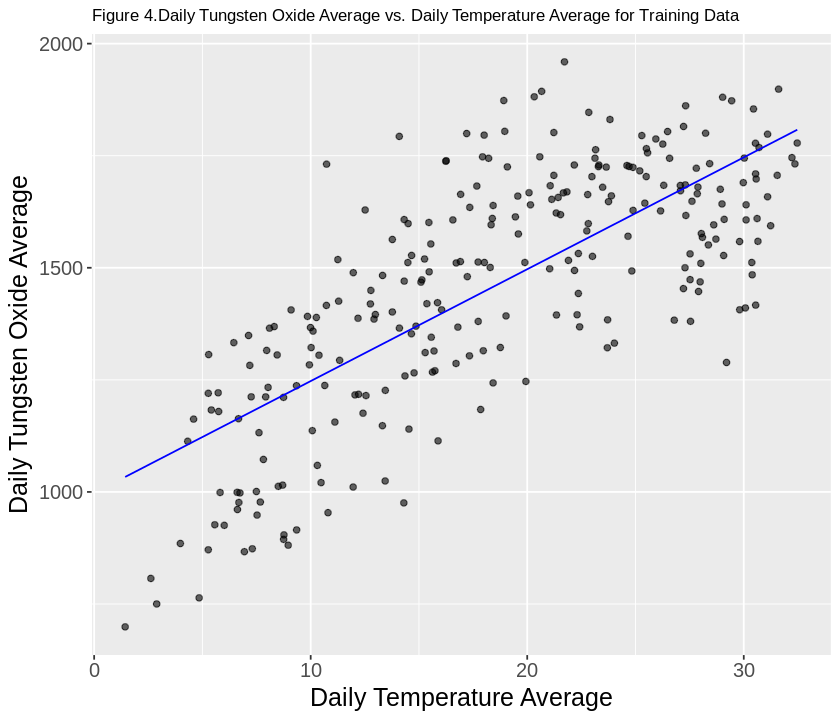

In [146]:
preds_T <- lm_fit_T |>
   predict(avg_air_quality_train) |>
   bind_cols(avg_air_quality_train)

options(repr.plot.width = 7, repr.plot.height = 6)

lm_predictions_T <- preds_T |>
     ggplot(aes(x = daily_avg_T, y = daily_avg_TO)) +
         geom_point(alpha = 0.6) +
         geom_line(
             mapping = aes(x = daily_avg_T, y = .pred), 
             color = "blue") +
         labs(title = "Figure 4.Daily Tungsten Oxide Average vs. Daily Temperature Average for Training Data",
       x = "Daily Temperature Average",
       y = "Daily Tungsten Oxide Average") +
         theme(text = element_text(size = 15)) +
        theme(plot.title = element_text(size = 10))


lm_predictions_T

In our first visualization with daily temperature average against daily tungsten oxide concentration average, the line of best fit has a positive slope, and reveals that it is a strong predictor. Based on this, we decided to use this predictor on our testing data. 

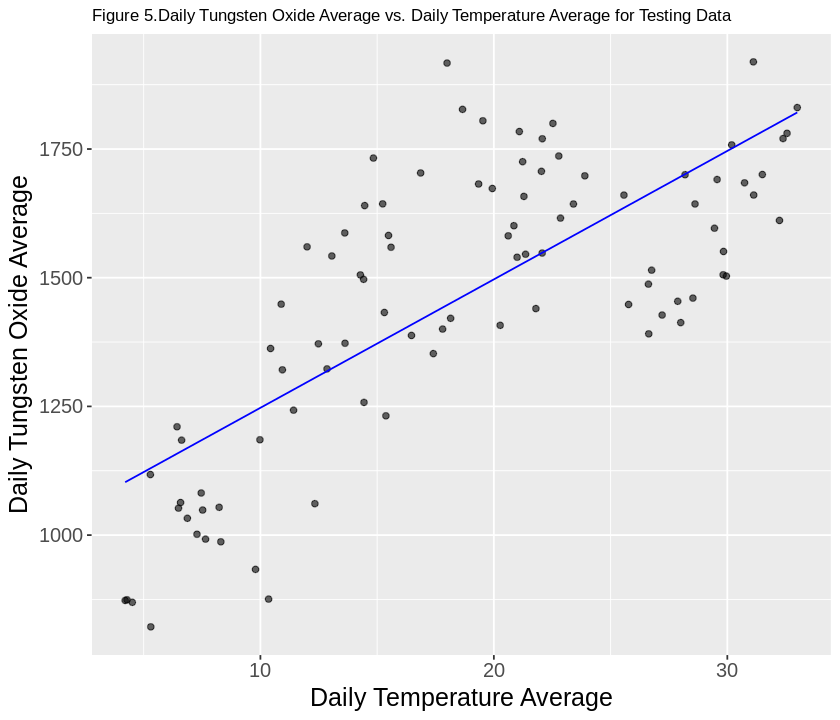

In [147]:
test_preds_T <- lm_fit_T |>
         predict(avg_air_quality_test) |>
         bind_cols(avg_air_quality_test) 

options(repr.plot.width = 7, repr.plot.height = 6)

lm_predictions_test_T <- test_preds_T |>
      ggplot(aes(x = daily_avg_T, y = daily_avg_TO)) +
         geom_point(alpha = 0.6) +
         geom_line(
             mapping = aes(x = daily_avg_T, y = .pred), 
             color = "blue") +
         labs(title = "Figure 5.Daily Tungsten Oxide Average vs. Daily Temperature Average for Testing Data",
       x = "Daily Temperature Average",
       y = "Daily Tungsten Oxide Average") +
         theme(text = element_text(size = 15)) +
        theme(plot.title = element_text(size = 10))
lm_predictions_test_T

We conducted the analysis with the daily temperature in the testing data, and completed the visualization; which revealed a positive correlation. 

The equation for the straight line is:

Daily Tungsten Oxide Average = β0 + β1⋅(Daily Temperature Average), where β0 is the vertical intercept of the line (the daily average of Tungsten Oxide when the daily average temp is 0) and β1 is the slope of the line (how daily average of Tungsten Oxide changes when daily temperature increases by one unit)

In [148]:
air_quality_test_results_T <- lm_fit_T |>
  predict(avg_air_quality_test) |>
  bind_cols(avg_air_quality_test) |>
  mutate(residuals_T = .pred - daily_avg_TO) |>
    select(-daily_avg_RH, -daily_avg_AH)

air_quality_regression_metrics_T <- air_quality_test_results_T |>
   metrics(truth = daily_avg_TO, estimate = .pred)

air_quality_RMSPE_T <- air_quality_regression_metrics_T |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()


air_quality_RMSPE_T

[1] 182.8324

We also found the RMSPE value, for the model with temperature and tungsten oxide is roughly 182.83. 

We applied this same process and logic to the absolute humidity predictor. This visualization also indicated a strong positive correlation based on the line of best fit. This predictor will also be included in the testing data analysis. 



In [149]:
lm_recipe_AH <- recipe(daily_avg_TO ~ daily_avg_AH, data = avg_air_quality_train)

lm_fit_AH <- workflow() |>
       add_recipe(lm_recipe_AH) |>
       add_model(lm_spec) |>
       fit(data = avg_air_quality_train)


lm_fit_AH

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  daily_avg_AH  
       887.8         553.6  


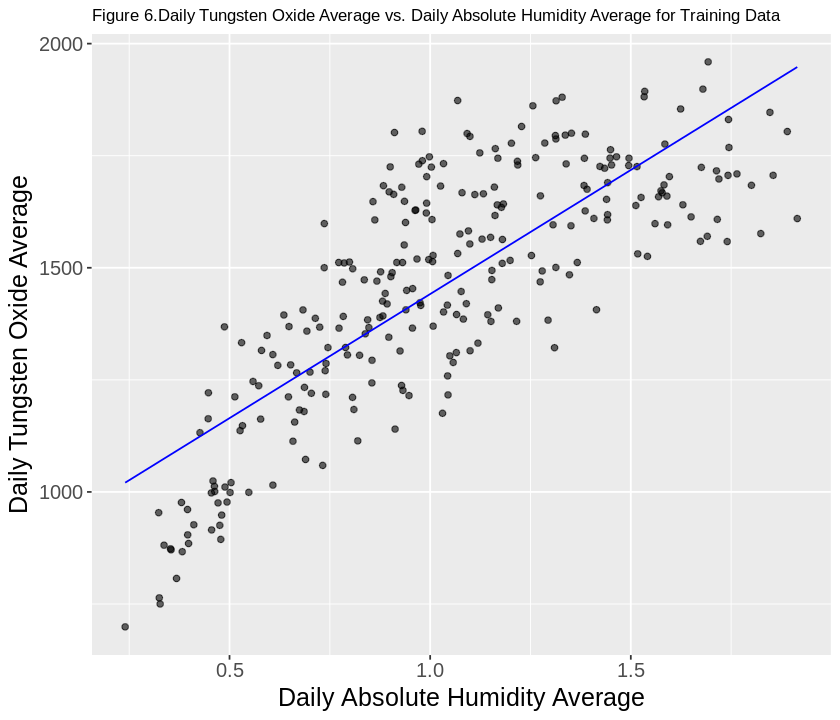

In [150]:
preds_AH <- lm_fit_AH |>
   predict(avg_air_quality_train) |>
   bind_cols(avg_air_quality_train)

options(repr.plot.width = 7, repr.plot.height = 6)


lm_predictions_AH <- preds_AH |>
     ggplot(aes(x = daily_avg_AH, y = daily_avg_TO)) +
         geom_point(alpha = 0.6) +
         geom_line(
             mapping = aes(x = daily_avg_AH, y = .pred), 
             color = "blue") +
         labs(title = "Figure 6.Daily Tungsten Oxide Average vs. Daily Absolute Humidity Average for Training Data",
       x = "Daily Absolute Humidity Average",
       y = "Daily Tungsten Oxide Average") +
         theme(text = element_text(size = 15)) +
        theme(plot.title = element_text(size = 10))


lm_predictions_AH

We conducted the analysis with the absolute humidity predictor in the testing data, and completed the visualization; which revealed a positive correlation. 


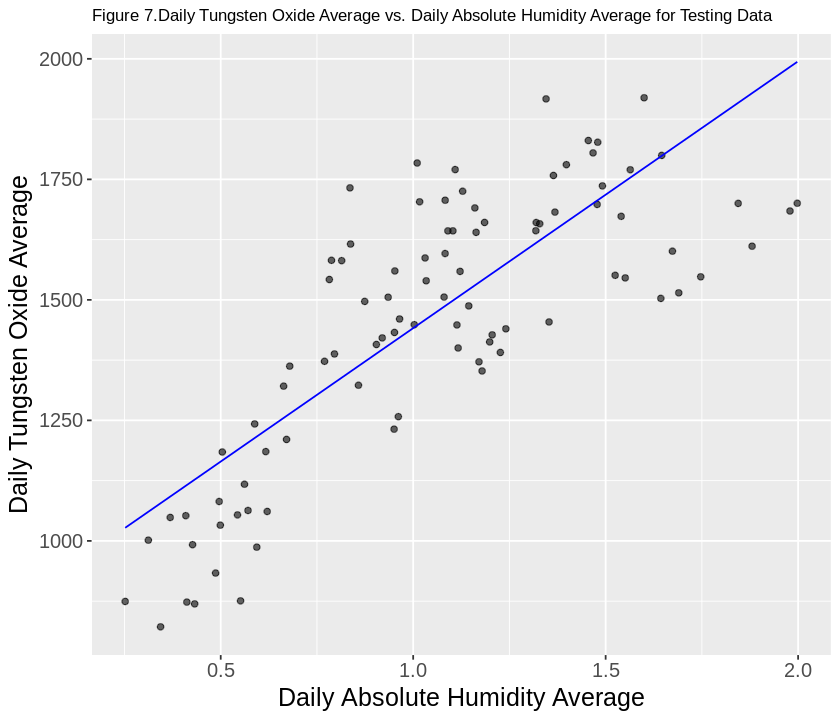

In [151]:
test_preds_AH <- lm_fit_AH |>
         predict(avg_air_quality_test) |>
         bind_cols(avg_air_quality_test) 

options(repr.plot.width = 7, repr.plot.height = 6)

lm_predictions_test_AH <- test_preds_AH |>
      ggplot(aes(x = daily_avg_AH, y = daily_avg_TO)) +
         geom_point(alpha = 0.6) +
         geom_line(
             mapping = aes(x = daily_avg_AH, y = .pred), 
             color = "blue") +
         labs(title = "Figure 7.Daily Tungsten Oxide Average vs. Daily Absolute Humidity Average for Testing Data",
       x = "Daily Absolute Humidity Average",
       y = "Daily Tungsten Oxide Average") +
         theme(text = element_text(size = 15)) +
        theme(plot.title = element_text(size = 10))  

lm_predictions_test_AH

The equation for the straight line is:

Daily Tungsten Oxide Average = β0 + β1⋅(daily absolute humidity average), where β0 is the vertical intercept of the line (the daily average of Tungsten Oxide when the daily absolute humidity average is 0) and β1 is the slope of the line (how daily average of Tungsten Oxide changes when daily absolute humidity average increases by one unit)

In [152]:
air_quality_test_results_AH <- lm_fit_AH |>
  predict(avg_air_quality_test) |>
  bind_cols(avg_air_quality_test) |>
  mutate(residuals_AH = .pred - daily_avg_TO) |>
    select(-daily_avg_T, -daily_avg_RH)

air_quality_regression_metrics_AH <- air_quality_test_results_AH |>
   metrics(truth = daily_avg_TO, estimate = .pred)

air_quality_RMSPE_AH <- air_quality_regression_metrics_AH |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()


air_quality_RMSPE_AH

[1] 169.3868

We also found the RMSPE value, for the model with absolute humidity and tungsten oxide is roughly 169.39.


This process was repeated for the training data for the relative humidity predictor. However, this line of best fit revealed that it is not a strong predictor, since the line had a slope that appeared to be near 0. Therefore from the graph, we concluded that relative humidity is not a good predictor, and we will not regress relative humidity against tungsten oxide concentration with the testing data. 

In [153]:
lm_recipe_RH <- recipe(daily_avg_TO ~ daily_avg_RH, data = avg_air_quality_train)

lm_fit_RH <- workflow() |>
       add_recipe(lm_recipe_RH) |>
       add_model(lm_spec) |>
       fit(data = avg_air_quality_train)


lm_fit_RH

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  daily_avg_RH  
   1470.2414       -0.2397  


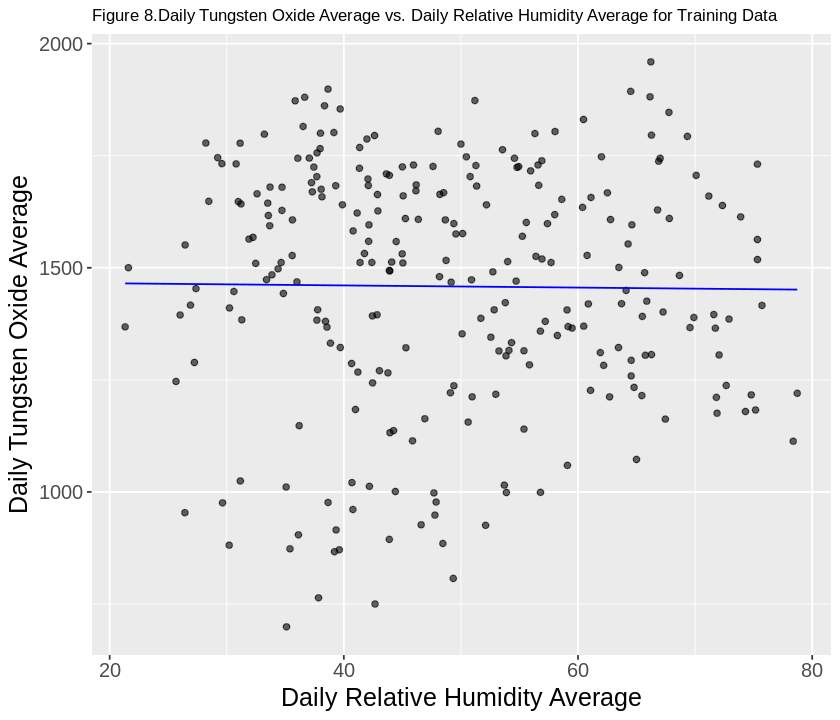

In [154]:
preds_RH <- lm_fit_RH |>
   predict(avg_air_quality_train) |>
   bind_cols(avg_air_quality_train)

options(repr.plot.width = 7, repr.plot.height = 6)

lm_predictions_RH <- preds_RH |>
     ggplot(aes(x = daily_avg_RH, y = daily_avg_TO)) +
         geom_point(alpha = 0.6) +
         geom_line(
             mapping = aes(x = daily_avg_RH, y = .pred), 
             color = "blue") +
         labs(title = "Figure 8.Daily Tungsten Oxide Average vs. Daily Relative Humidity Average for Training Data",
       x = "Daily Relative Humidity Average",
       y = "Daily Tungsten Oxide Average") +
         theme(text = element_text(size = 15)) +
        theme(plot.title = element_text(size = 10))


lm_predictions_RH

The equation for the straight line is:

Daily Tungsten Oxide Average = β0 + β1⋅(daily relative humidity average),
where β0 is the vertical intercept of the line (the daily average of Tungsten Oxide when the daily relative humidity average is 0) and β1 is the slope of the line (how daily average of Tungsten Oxide changes when daily relative humidity average increases by one unit). From the graph, we can see that relative humidity is not a good predictor, so we will not regress temperature on this predictor using the test data.

In [155]:
air_quality_test_results_RH <- lm_fit_RH |>
  predict(avg_air_quality_test) |>
  bind_cols(avg_air_quality_test) |>
  mutate(residuals_RH = .pred - daily_avg_TO) |>
    select(-daily_avg_AH, -daily_avg_T)

air_quality_regression_metrics_RH <- air_quality_test_results_RH |>
   metrics(truth = daily_avg_TO, estimate = .pred)

air_quality_RMSPE_RH <- air_quality_regression_metrics_RH |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()


air_quality_RMSPE_RH

[1] 276.0657

To confirm that relative humidity is not a good predictor, we calculated the RMSE value and obtained a large value of 276.07. This high error value supported our decision to conduct a linear regression with the testing data or use relative humidity going forward in our data analysis.


In [156]:
RMSPE_comparison<-tibble(air_quality_RMSPE_T, air_quality_RMSPE_AH, 
                         air_quality_RMSPE_RH)
RMSPE_comparison

air_quality_RMSPE_T,air_quality_RMSPE_AH,air_quality_RMSPE_RH
<dbl>,<dbl>,<dbl>
182.8324,169.3868,276.0657


Table 3: Summarized RMSPE values for temperature, absolute humidity, and relative humidity 

Overall, our model will include absolute humidity and temperature, and exclude relative humidity, based on the simple linear regressions and the differences in the RMSPE values. This could be explained by the fact that relative humidity is the ratio of the absolute humidity, compared to the maximum amount of water that could be held in the air based on the temperature. Warm air possesses more moisture than cold air, so even if there is the same amount of humidity in the air, the relative humidity is higher in the cooler environment since the maximum amount of possible humidity is lower. (National Oceanic and Atmospheric Administration, 2015) With context to our analysis, our RMSPE value for relative humidity is high since there is a greater distance between the line of best fit and each point. Since the relative humidity is dependent on temperature and the ratio changes daily, pollutant concentration could be more difficult to predict. To better assess the meaning of each RMSPE value, we would need to conduct a knn regression to compare goodness of fit. 

To summarize our results with the two effective predictors, (absolute humidity and temperature) we conducted a multivariable regression. 

In [157]:
lm_recipe_both <- recipe(daily_avg_TO ~ daily_avg_T + daily_avg_AH, data = avg_air_quality_train)

lm_fit_both <- workflow() |>
       add_recipe(lm_recipe_both) |>
       add_model(lm_spec) |>
       fit(data = avg_air_quality_train)
           
lm_fit_both

preds_both <- lm_fit_both |>
    predict(avg_air_quality_test) |>
    bind_cols(avg_air_quality_test) |>
    metrics(truth = daily_avg_TO, estimate = .pred)

rmspe_both <- preds_both |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()


rmspe_both

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)   daily_avg_T  daily_avg_AH  
      870.99         10.34        384.65  


[1] 160.7764

Our unscaled multivariate regression includes the predictors for the daily average temperature and absolute humidity. The equation of the line is:
Daily Tungsten Oxide Average = β0 + 10.34⋅(Daily Temperature Average) + 
384.65 (Daily Absolute Humidity Average).
The RMSPE for the model is 160.77, a smaller value than the RMSPEs of the single variable regression models. The reduction of error indicates that the multivariable model is the more accurate model for the data. 
However, there is a significant difference between these two coefficients, so we have scaled the regression such that there is more validity to our interpretation of these results.


In [158]:
lm_recipe_both_standardized <- recipe(daily_avg_TO ~ daily_avg_T + daily_avg_AH, data = avg_air_quality_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

lm_fit_both_standarized <- workflow() |>
       add_recipe(lm_recipe_both_standardized) |>
       add_model(lm_spec) |>
       fit(data = avg_air_quality_train)
lm_fit_both_standarized

preds_both_standardized <- lm_fit_both_standarized |>
    predict(avg_air_quality_test) |>
    bind_cols(avg_air_quality_test) |>
    metrics(truth = daily_avg_TO, estimate = .pred)

rmspe_both_standardized <- preds_both_standardized |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()


rmspe_both_standardized

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)   daily_avg_T  daily_avg_AH  
     1458.46         83.17        149.17  


[1] 160.7764

When scaling, the equation becomes:
Daily Tungsten Oxide Average = β0 + 83.17(Daily Temperature Average) + 
149.17 (Daily Absolute Humidity Average).
Scaling the coefficients largely reduces the difference between the two. Nonetheless,  the absolute humidity predictor variable still has a greater effect on the concentration of tungsten oxide than temperature. For a one unit increase in daily average temperature, there is a 83.17 microg/m^3 increase in the daily average concentration of tungsten oxide. For a one unit increase in daily average absolute humidity, there is a 149.17 microg/m^3 increase in the daily average concentration of tungsten oxide. The RMSPE value for the model did not change. 


In [159]:
avg_concentration <- mean(avg_air_quality$daily_avg_TO)
avg_concentration

[1] 1457.012

In order to evaluate whether our model is accurate or not, we must analyze our value within the context of our model. RMSE measures the average deviation from the predicted values of our linear regression. In our scenario we are measuring the concentration of Tungsten Oxide in the atmosphere. The mean concentration of tungsten oxide across all observations is 1457.01, thus an average deviation of only 160.77 indicates a relatively accurate predictive model. The regressions performed using only daily temperature average and daily absolute humidity average give rmse’s of 182.83 and 169.39 respectively. Using these values and our visualizations, we can infer that daily temperature average and daily absolute humidity average are relatively accurate predictors of daily average concentration of Tungsten Oxide in the air. Our visualization and earlier analysis of relative humidity indicates that relative humidity is an inaccurate predictor, and has a very weak correlation to concentration of Tungsten Oxide concentration in the air on a given day. 

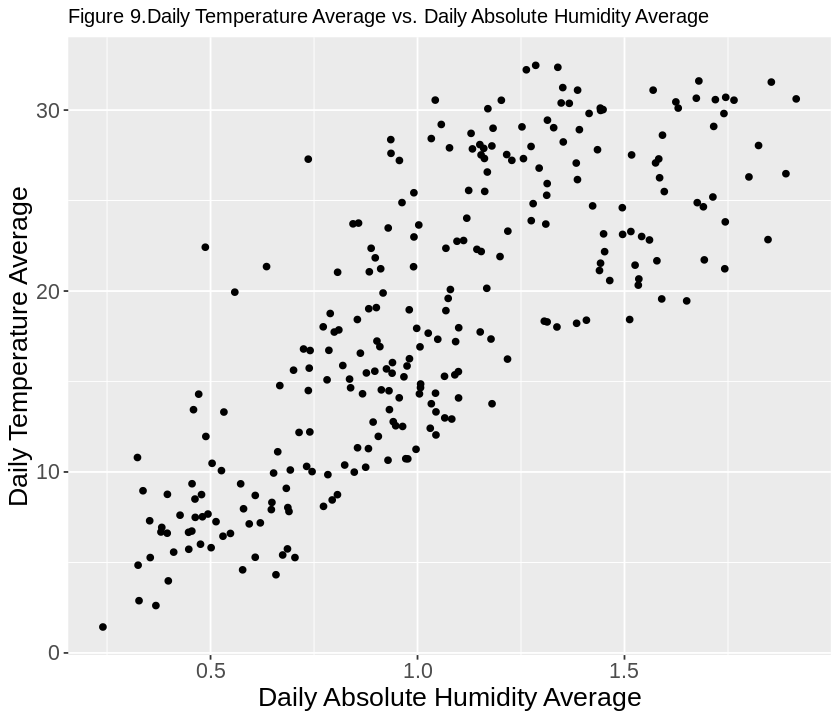

In [160]:
ggplot(avg_air_quality_train, aes(x = daily_avg_AH, y = daily_avg_T)) +
  geom_point() +
  labs(title = "Figure 9.Daily Temperature Average vs. Daily Absolute Humidity Average",
       x = "Daily Absolute Humidity Average",
       y = "Daily Temperature Average") + 
theme(text = element_text(size = 16)) +
theme(plot.title = element_text(size = 12))

Two common issues to address when running a multivariate regression are outliers and multicollinearity. From figures 1 and 3, we can deduce that from simply looking at the graph, there are no visible outliers. However, when we run the best fit line from our regression model in figure 4 and 6, outliers do seem to affect the data minimally. There are a few points that are relatively far from the best fit line, and might affect our analysis. As for figure 2, there is no observable pattern, making it difficult to determine if there are any outliers in that data. Relative humidity was not a good predictor for our multivariate regression, so even if there were any outliers, they are not relevant to this part of the discussion. From analyzing the figures previously mentioned, we can state that the interpretability of our findings is not significantly affected by outliers, because our sample is large enough and from looking at the visualizations, there are few outliers. They are unlikely to affect our model, and we can assume the RMSPE is not significantly skewed. The second issue, multicollinearity, does seem to affect the data significantly. When graphing our two predictors in the multivariate regression, figure 9 reveals a strong positive correlation between the two variables. This indicates there is multicollinearity in the model, making our coefficients unreliable and volatile.

Before conducting our analysis, we predicted that relative and absolute humidity would be the best predictors of Tungsten Oxide concentration. We predicted a positive correlation. This is because higher levels of humidity can result in air pollutants being trapped closer to the ground and being unable to disperse into the atmosphere.  (Liu et al., 2020). With higher temperatures often being associated with higher levels of humidity, we predicted a positive correlation between temperature and tungsten oxide concentration as well. Our findings indicate that we were correct in predicting a positive correlation with temperature and absolute humidity, but were incorrect in predicting that there would be a correlation with relative humidity. 

For the purposes of our data analysis, we predicted the pollutant level from the humidity and the temperature, but the ability of our model to predict accurately indicates the reverse is likely true as well – pollutant amount predicts temperature and absolute humidity. These findings could be significant for determining the impacts of tungsten oxide concentration and developing strategies to reduce its concentration in order to mitigate its negative effects. Understanding how closely tungsten oxide is related to absolute and relative humidity can help policymakers assess the effects of tungsten oxide and other air pollutants on the surrounding environments. These findings could serve to validate any hypotheses that air pollutants can lead to global warming. Additionally, relative humidity not being a useful predictor illustrates the complicated nature of air pollution, reminding us to ensure our policy is based on real data and not the preconceptions we have about what the data will likely look like.
 
These findings could also lead to further questions such as: Why does relative humidity not have correlation to pollutant levels while absolute humidity does? If we expanded the study by year from 2004 to 2022, would a relationship be more prominent? What are the large scale effects of pollutant accumulation? Are there any other factors besides pollutant accumulation which lead to increase AH, RH or temperatur? 


**References**

EPA. (2024). Air Quality and Climate Change Research. Environmental Protection Agency. https://www.epa.gov/air-research/air-quality-and-climate-change-research#:~:text=Emissions%20of%20pollutants%20into%20the,cooling%20effects%20on%20the%20climate. 

Liu, Y., Zhou, Y., & Lu, J. (2020). Exploring the relationship between air pollution and meteorological conditions in China under environmental governance. Nature News. https://www.nature.com/articles/s41598-020-71338-7 

National Oceanic and Atmospheric Administration. (2015, June 13). A Discussion of Water Vapor, Humidity, and Dewpoint, and Relationship to Precipitation. National Weather Service. https://www.weather.gov/lmk/humidity#:~:text=RELATIVE%20HUMIDITY%3A&text=Warm%20air%20can%20possess%20more,if%20the%20air%20is%20warmer. 

Vito, Saverio. (2016). Air Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.